In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
import kagglehub

path = kagglehub.dataset_download("furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded")

print("Path to dataset files:", path)

Path to dataset files: /Users/nedday/.cache/kagglehub/datasets/furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded/versions/1


In [ ]:
import os
print("Dataset directory structure:")
print(os.listdir(path))


Dataset directory structure:
['asl-dataset-gray', 'asl-dataset']


In [ ]:
dataset_path =  "/Users/nedday/.cache/kagglehub/datasets/furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded/versions/1/asl-dataset/asl-dataset"

In [ ]:
# Alphabets disponibles dans le dataset
alphabet_array = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

## Pré-traitement 

In [ ]:
# Charger les images et leurs étiquettes
image_arr = []
image_name_value = []

# Taille cible pour toutes les images
target_size = (28, 28)

for letter in alphabet_array:
    path_letter = os.path.join(dataset_path, "train", letter)
    if not os.path.exists(path_letter):
        print(f"Le dossier {path_letter} n'existe pas.")
        continue

    for image_name in os.listdir(path_letter):
        image_path = os.path.join(path_letter, image_name)
        image = plt.imread(image_path)

        if image is None:
            print(f"Erreur de lecture de l'image {image_path}")
            continue

        if image.ndim == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        resized_image = cv2.resize(image, target_size)
        image_arr.append(resized_image.flatten())
        image_name_value.append(letter)

KeyboardInterrupt: 

In [ ]:
# Normalisation des données

resized_image = resized_image / 255.0

## Visualisation des images 

In [ ]:
def display_images(path_letter, num_images=5):
    image_names = os.listdir(path_letter)
    images_to_show = image_names[:num_images]  # Sélectionner un nombre d'images à afficher
    
    plt.figure(figsize=(10, 10))
    
    for idx, image_name in enumerate(images_to_show):
        image_path = os.path.join(path_letter, image_name)
        image = plt.imread(image_path)
        
        plt.subplot(1, num_images, idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(image_name)
        plt.axis('off')
    
    plt.show()

Visualisation des images pour la lettre A:


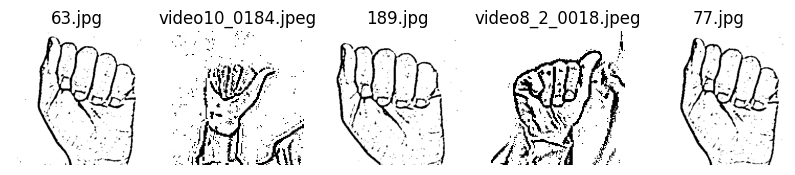

Visualisation des images pour la lettre B:


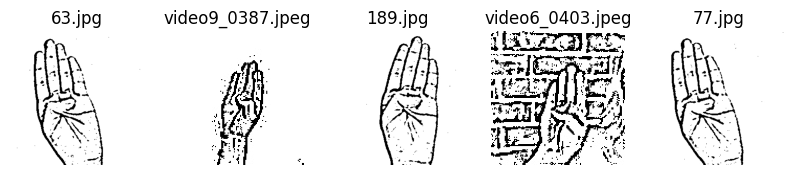

Visualisation des images pour la lettre C:


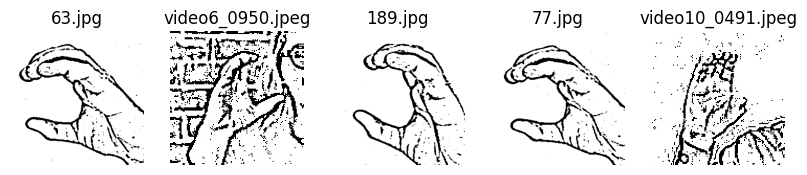

Visualisation des images pour la lettre D:


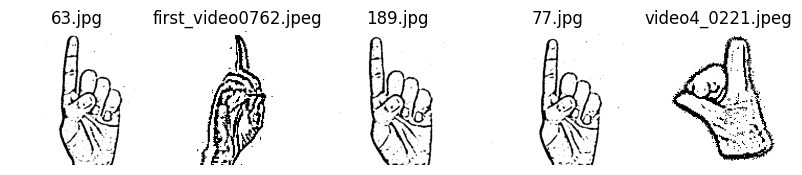

Visualisation des images pour la lettre E:


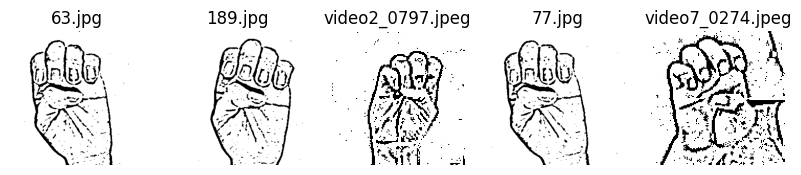

Visualisation des images pour la lettre F:


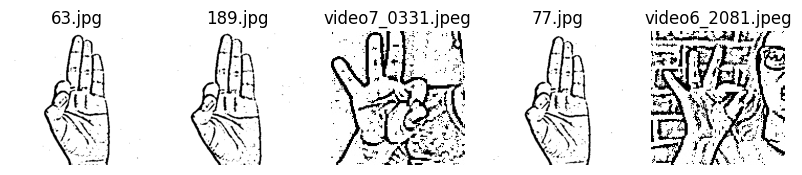

Visualisation des images pour la lettre G:


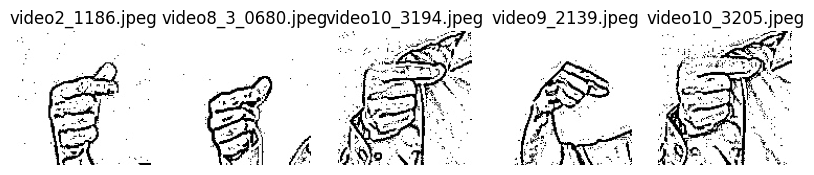

Visualisation des images pour la lettre H:


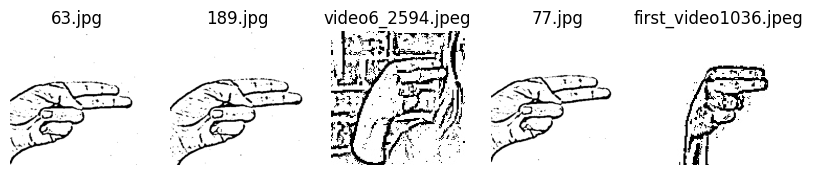

Visualisation des images pour la lettre I:


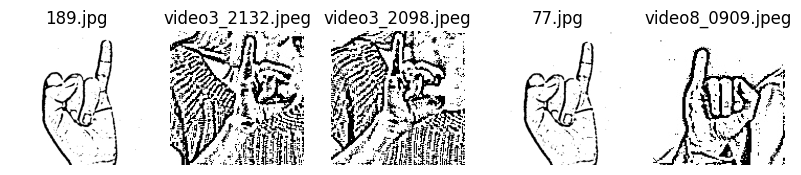

Visualisation des images pour la lettre K:


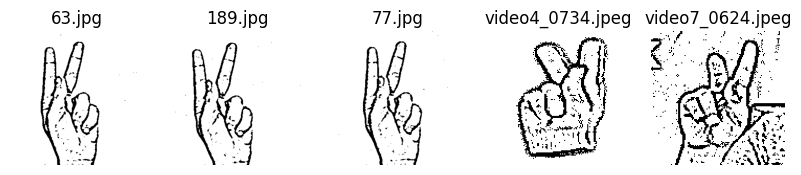

Visualisation des images pour la lettre L:


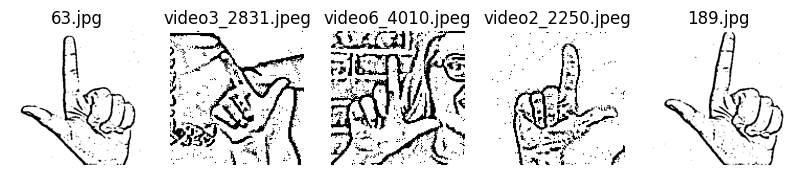

Visualisation des images pour la lettre M:


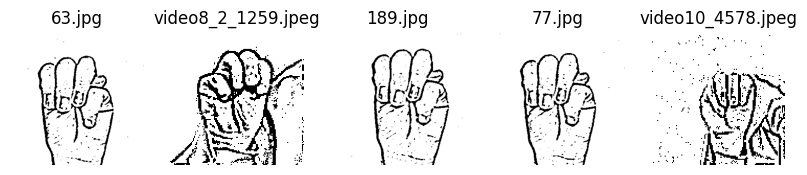

Visualisation des images pour la lettre N:


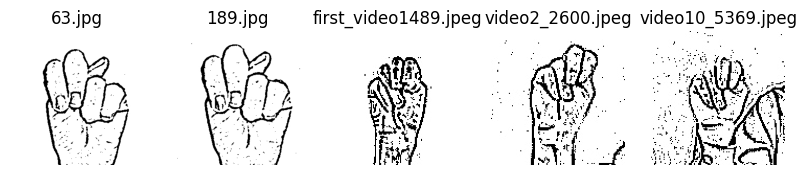

Visualisation des images pour la lettre O:


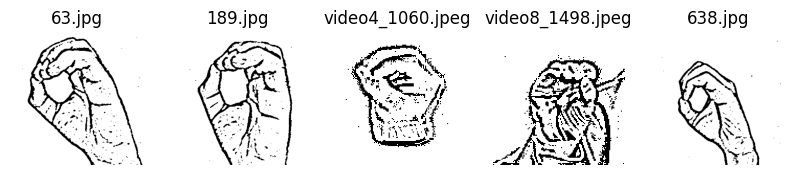

Visualisation des images pour la lettre P:


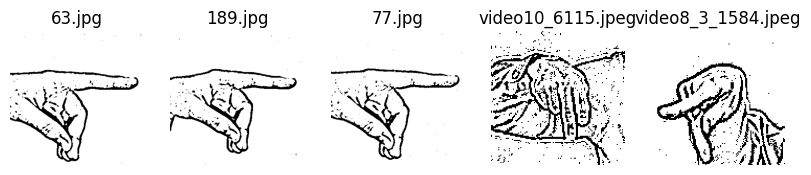

Visualisation des images pour la lettre Q:


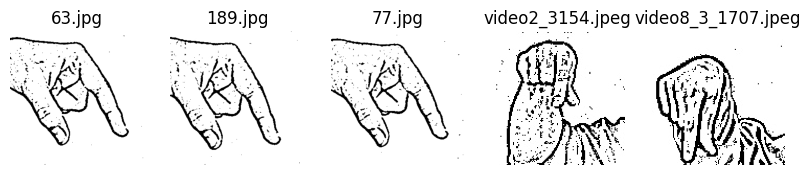

Visualisation des images pour la lettre R:


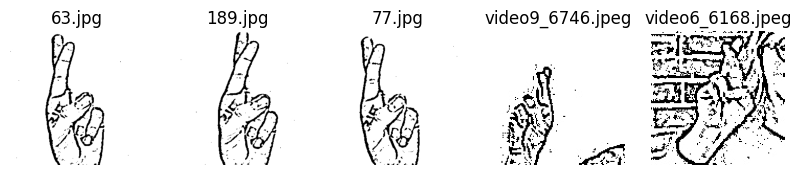

Visualisation des images pour la lettre S:


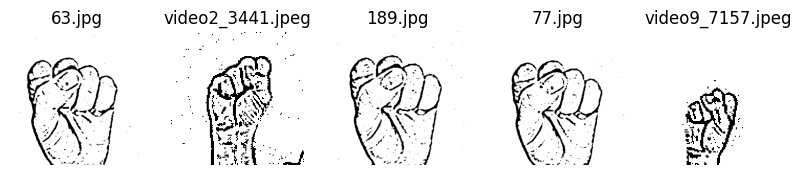

Visualisation des images pour la lettre T:


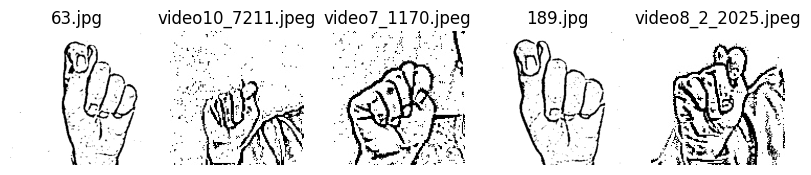

Visualisation des images pour la lettre U:


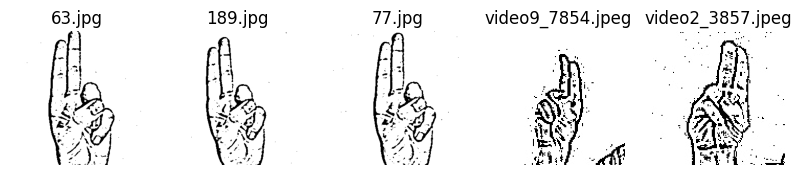

Visualisation des images pour la lettre V:


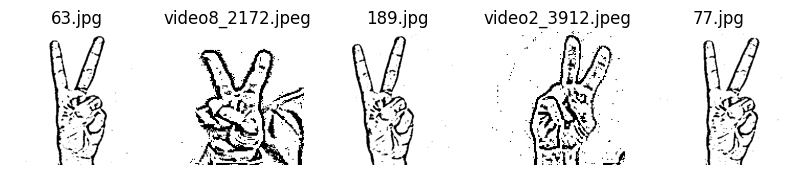

Visualisation des images pour la lettre W:


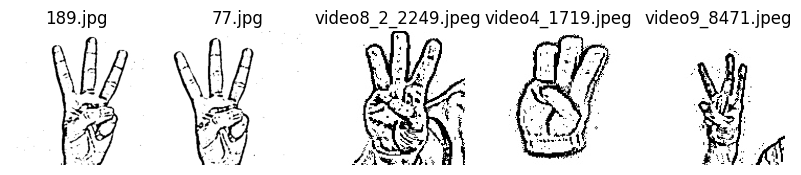

Visualisation des images pour la lettre X:


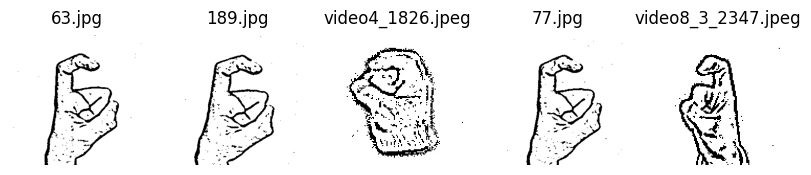

Visualisation des images pour la lettre Y:


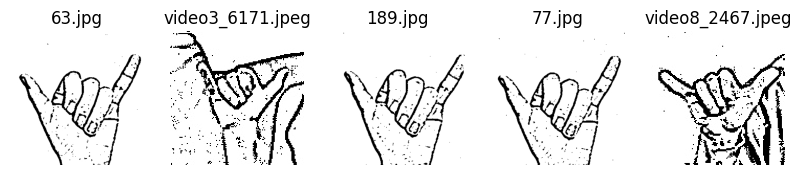

In [ ]:
for letter in alphabet_array:
    path_letter = os.path.join(dataset_path, "train", letter)
    if not os.path.exists(path_letter):
        print(f"Le dossier {path_letter} n'existe pas.")
        continue
    
    print(f"Visualisation des images pour la lettre {letter}:")
    display_images(path_letter, num_images=5)

In [ ]:
# Convertir les listes en tableaux numpy
X = np.array(image_arr)
y = np.array(image_name_value)

## Exploration des données 

In [ ]:
# Créer un mapping des étiquettes vers des entiers
label_to_int = {label: idx for idx, label in enumerate(np.unique(y))}
y_data = np.array([label_to_int[label] for label in y])

# Affichage du nombre d'images traitées pour chaque lettre
for letter in alphabet_array:
    count = y_data.tolist().count(label_to_int[letter])
    print(f"Nombre d'images pour {letter}: {count}")

Nombre d'images pour A: 1220
Nombre d'images pour B: 1312
Nombre d'images pour C: 1150
Nombre d'images pour D: 1538
Nombre d'images pour E: 1524
Nombre d'images pour F: 1528
Nombre d'images pour G: 743
Nombre d'images pour H: 1332
Nombre d'images pour I: 1302
Nombre d'images pour K: 1360
Nombre d'images pour L: 1258
Nombre d'images pour M: 1284
Nombre d'images pour N: 1332
Nombre d'images pour O: 1029
Nombre d'images pour P: 1088
Nombre d'images pour Q: 1111
Nombre d'images pour R: 1200
Nombre d'images pour S: 1192
Nombre d'images pour T: 1196
Nombre d'images pour U: 1296
Nombre d'images pour V: 1319
Nombre d'images pour W: 1148
Nombre d'images pour X: 1254
Nombre d'images pour Y: 1334


### Diviser les données en ensembles d'entraînement et de test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/nedday/Documents/All Projects /hand-sign-images-classification-project/hand-sign-images-classification-project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.04%


In [ ]:
# Affichage du rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       209
           B       0.99      1.00      0.99       182
           C       0.98      1.00      0.99       250
           D       0.98      0.93      0.95       255
           E       0.99      0.97      0.98       183
           F       0.93      0.97      0.95       246
           G       0.98      0.93      0.95       213
           H       0.95      0.96      0.95       225
           I       0.92      0.95      0.94       220
           K       0.96      0.93      0.94       227
           L       0.97      0.93      0.95       249
           M       0.98      0.95      0.97       216
           N       0.97      0.96      0.97       236
           O       0.96      0.98      0.97       262
           P       0.98      0.96      0.97       219
           Q       0.94      0.98      0.96       235
           R       0.87      0.86      0.86       266
    

GridSearch 

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'solver': ['liblinear']  # Solver adapté pour L1 (en plus de L2)
}

In [14]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

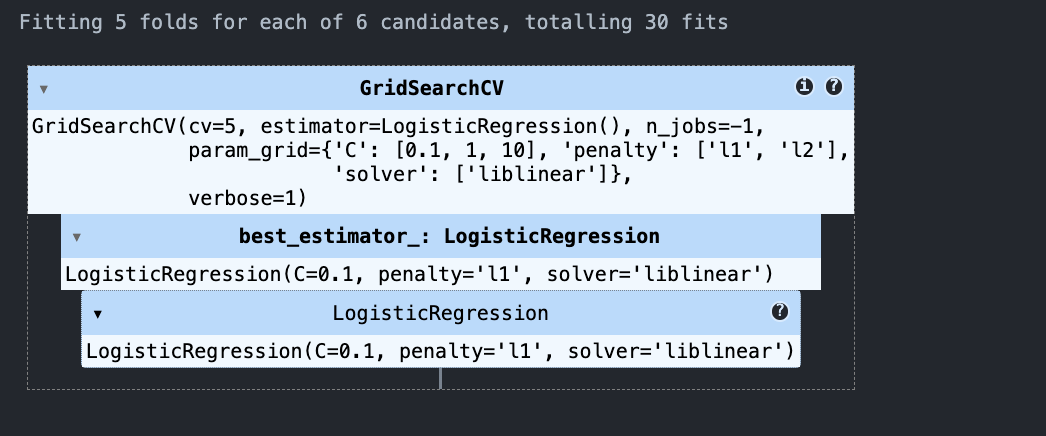

In [ ]:
# Résultats du GridSearch
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Meilleurs hyperparamètres : {best_params}")
print(f"Meilleure précision moyenne : {best_score:.4f}")

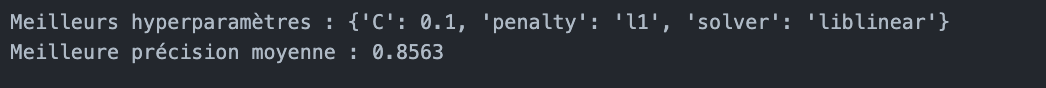

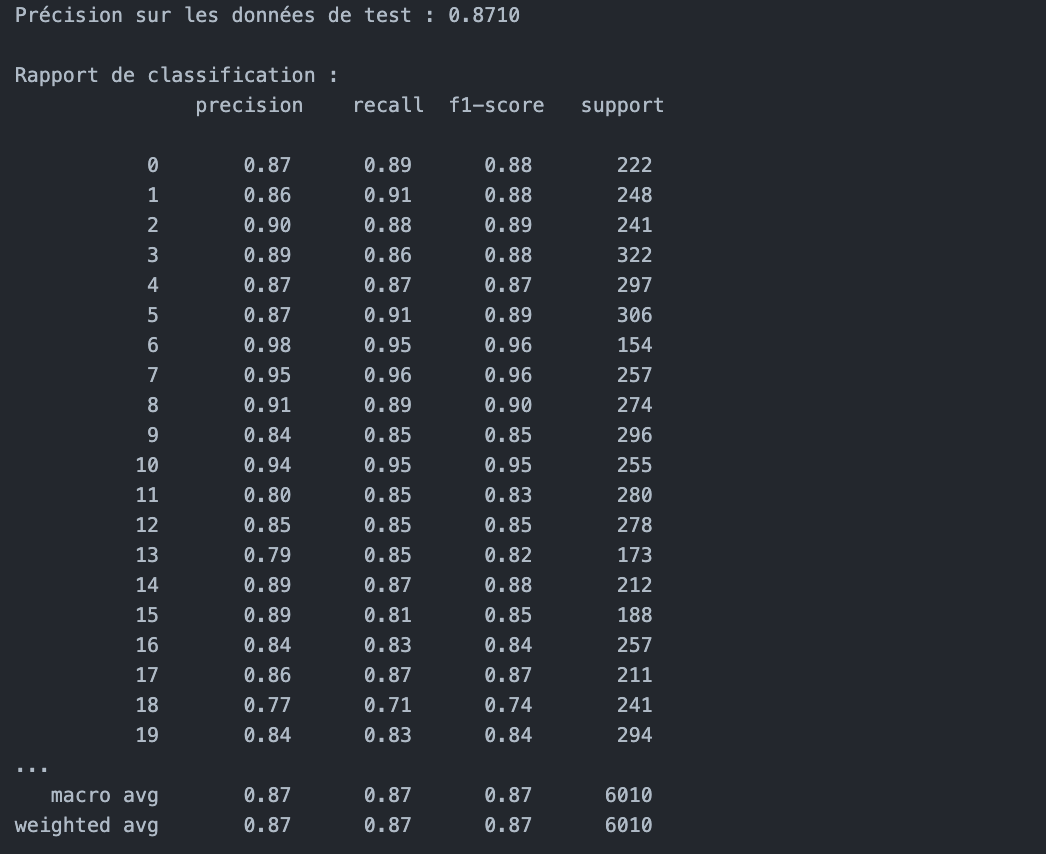